# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión logística: Lección 1**
### **EDA**

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Librería patra gestión de nulos
# ======================
from sklearn.impute import KNNImputer


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import os

**Objetivos**

- Buscar un conjunto de datos a analizar.
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


In [2]:
os.getcwd()

'/mnt/c/Users/lidya/Documents/Nuestros documentos/Documentos de Lidya/Estudios/Adalab/modulos/modulo3/pair_programming/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-logistica'

In [3]:
df = pd.read_csv('../datos/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado.


- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
Interpretación de los resultados.

> Primero hacemos un análisis exploratorio básico

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
for col in df.columns:
    print(df[col].value_counts())

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: Flight Distance, Length: 5398, dtype: int64
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64
3    28150
4    27216
2    27146
1    21076
5    20347
0     5

In [6]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
df.isnull().sum()*100 / df.shape[0]

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


> Cambiamos las columnas a su tipo correcto

In [11]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [12]:
col_cat = ['Gender', 'Customer Type', 'Type of Travel',
       'Class', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']


df[col_cat] = df[col_cat].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129880 non-null  object  
 1   Gender                             129880 non-null  category
 2   Customer Type                      129880 non-null  category
 3   Age                                129880 non-null  int64   
 4   Type of Travel                     129880 non-null  category
 5   Class                              129880 non-null  category
 6   Flight Distance                    129880 non-null  int64   
 7   Seat comfort                       129880 non-null  category
 8   Departure/Arrival time convenient  129880 non-null  category
 9   Food and drink                     129880 non-null  category
 10  Gate location                      129880 non-null  category
 11  Inflight wifi service     

> Renombramos las columnas

In [14]:
nuevas_columnas = {col: col.replace(" ", "_").replace("/", "_").replace("-", "_").lower() for col in df.columns}

df.rename(columns = nuevas_columnas, inplace = True)

In [15]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


> Gestionamos los valores nulos

In [16]:
numericas = df.select_dtypes(include=np.number)

imputer = KNNImputer(n_neighbors=5)
imputer.fit(numericas)
imputer.transform(numericas)

numericas = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [17]:
numericas = numericas.astype("int64")

In [18]:
columnas = numericas.columns

df.drop(columnas, axis = 1, inplace=True)

df[columnas] = numericas[columnas]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129880 non-null  object  
 1   gender                             129880 non-null  category
 2   customer_type                      129880 non-null  category
 3   type_of_travel                     129880 non-null  category
 4   class                              129880 non-null  category
 5   seat_comfort                       129880 non-null  category
 6   departure_arrival_time_convenient  129880 non-null  category
 7   food_and_drink                     129880 non-null  category
 8   gate_location                      129880 non-null  category
 9   inflight_wifi_service              129880 non-null  category
 10  inflight_entertainment             129880 non-null  category
 11  online_support            

> Realizamos análisis exploratorio visual

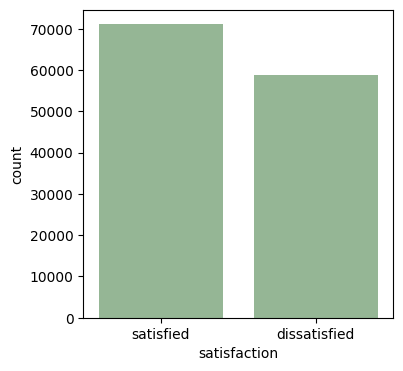

In [20]:
# Primero comprobamos nuestra variable respuesta

plt.figure(figsize=(4,4))

fig = sns.countplot(data = df, x = "satisfaction",  color = "darkseagreen")
plt.show();

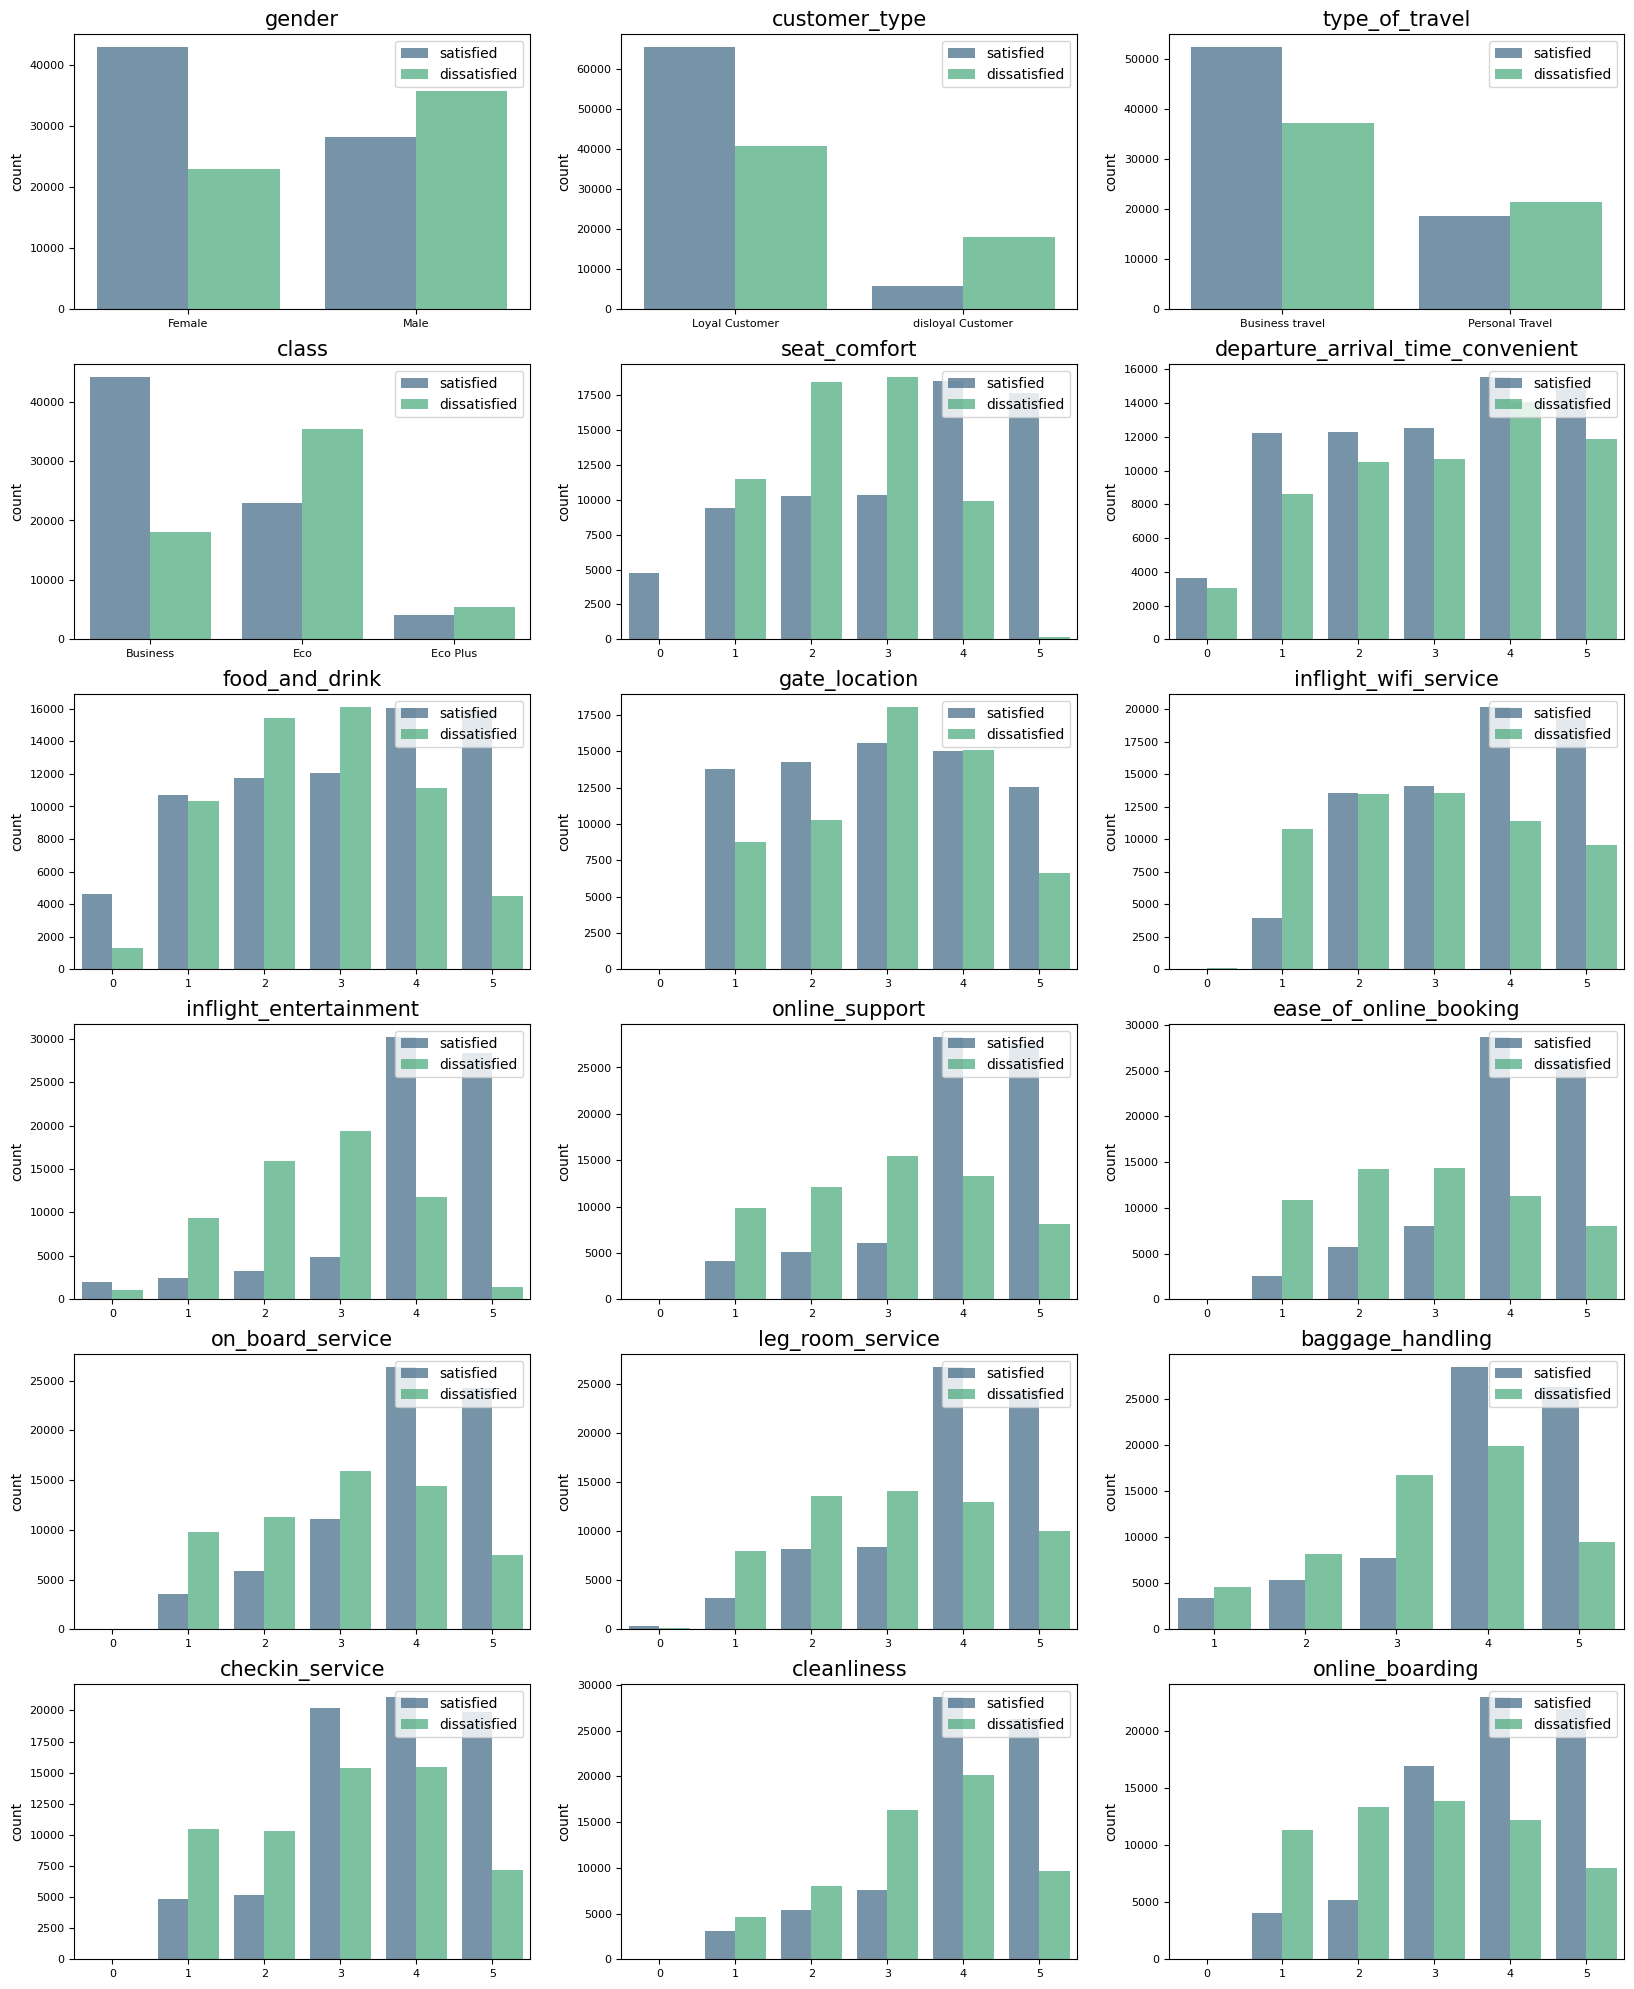

In [21]:
# Distribución para cada variable categórica

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 25))

axes = axes.flat
categoricas = df.select_dtypes(include = "category").columns

for i, colum in enumerate(categoricas): 
    sns.countplot(data = df, x = colum, hue = "satisfaction", alpha = 0.7, ax = axes[i], palette = "viridis")    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")



`Podemos comprobar que en la mayoría de los casos de las variables que miden la satisfacción, las distribuciones suelen ser una progresión ascendente dentro de los clientes satisfechos y una distribución más normalizada (tipo campana de Gauss) para los clientes insatisfechos.`

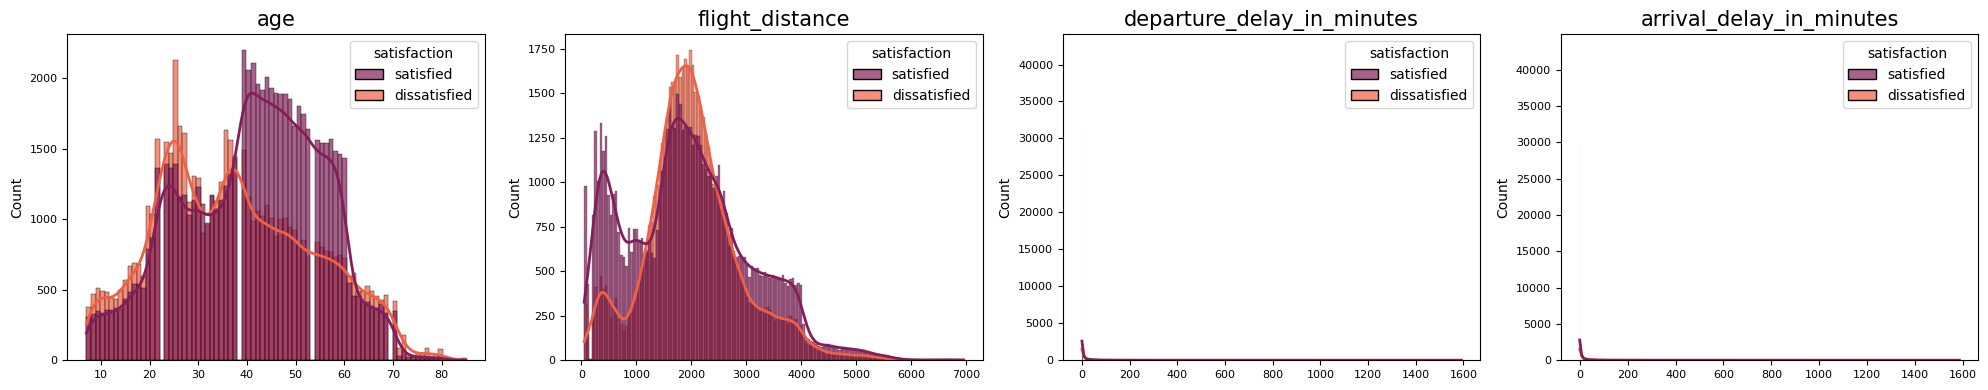

In [22]:
# Distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 4))
axes = axes.flat

for i, colum in enumerate(numericas): 
    sns.histplot(data = df, x = colum, hue = "satisfaction", kde = True, palette = "rocket", line_kws = {"linewidth": 2}, alpha = 0.7, ax = axes[i])  
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "light")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
fig.tight_layout();

` En la gráfica edad, podemos destacar que la satisfacción de los viajeros de entre 40 y 60  años se incrementa de manera notable respecto a los insatisfechos. Intuimos que puede ser porque consuman vuelos de categoría superior.`
`En cambio, los pasajeros menores de 40 años se sienten más insatisfechos por los servicios de la aerolínea; aunque la diferencia entre satisfechos e insatisfechos es mucho menor.`

`Destacable comentar que los retrasos en los vuelos es más bien una situación excepcional.`

> Sacamos la correlación

In [23]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0
1,47,2464,310,305
2,15,2138,0,0
3,60,623,0,0
4,70,354,0,0


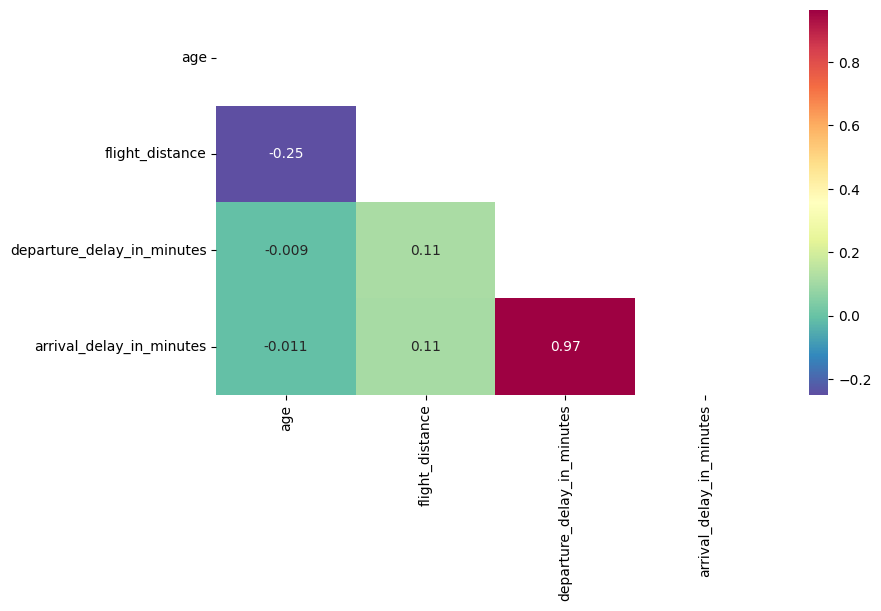

In [24]:
plt.figure(figsize=(9,5))
mask = np.triu(np.ones_like(numericas.corr(), dtype=bool))
sns.heatmap(numericas.corr(), cmap="Spectral_r", annot = True, mask = mask);

`Destacar que hay una fuerte correlación entre los retrasos en las salidas y los retrasos en las llegadas (como esperabamos).`


> Exploramos los boxplots en busca de outliers

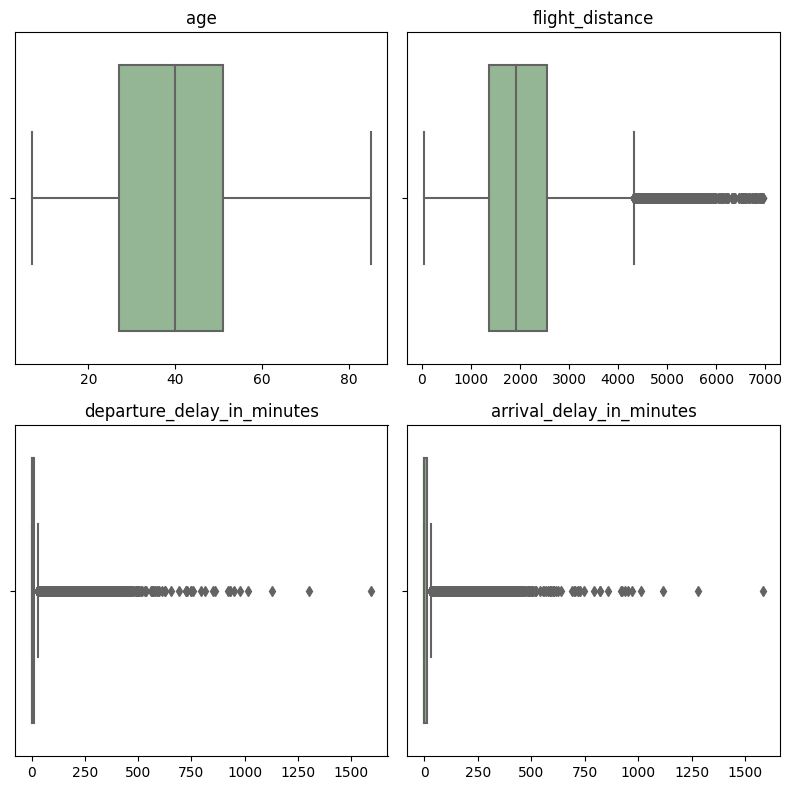

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))

axes = axes.flat

for indice, col in enumerate(numericas):

    sns.boxplot(x = col, data = numericas, ax=axes[indice], color = "darkseagreen");

    axes[indice].set_title(col)
    axes[indice].set_xlabel("")

fig.tight_layout();

` Como podemos observar, tenemos una gran cantidad de outliers en las columnas de retrasos en llegadas y salidas y en distancia de vuelo. Sin embargo, hemos decicido no tratar estos outliers  por considerar que forman una parte muy pequeña de la muestra y que la información que aportan es relevante para nuestro modelo de predicción.`

> Eliminamos columna redundante

` Despues de analizar visualmente la correlación que existe entre nuestras variable numéricas, concluimos que las columnas departure_delay_in_minutes y arrival_delay_in_minutes, nos aporta la misma información por lo que procedemos a eliminar la segunda.` 

In [26]:
df.drop('arrival_delay_in_minutes', axis=1, inplace=True)

In [27]:
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,65,265,0
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,47,2464,310
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,15,2138,0
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,60,623,0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,70,354,0


In [28]:
# Lo guardamos también en formato pickle porque queremos que nos mantenga las variables de tipo "category"

df.to_csv('../datos/Invistico_Airline_limpio.csv')
df.to_pickle('../datos/Invistico_Airline_limpio.pkl')